In [1]:
%matplotlib notebook

import numpy as np
from scipy.ndimage import gaussian_filter as gauss
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.gridspec as gridspec

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14

<IPython.core.display.Javascript object>


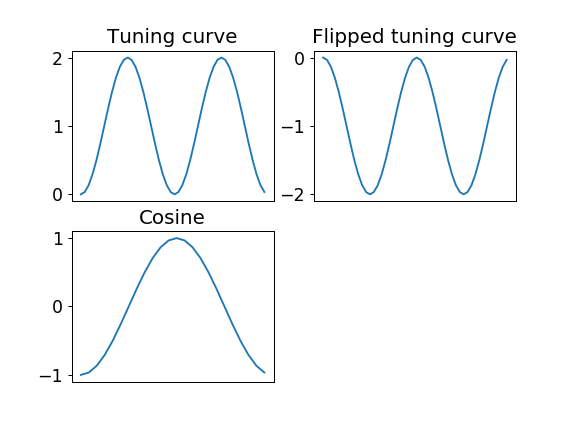

In [32]:
# Own visualisation

plt.close()

fig = plt.figure()

# So-called "tuning curve" a.k.a. Mahalanobis distances from bins
ax = fig.add_subplot(221)
ax.plot(-np.cos(np.arange(-2*np.pi, 2*np.pi, np.pi/12)) + 1)
ax.set_title("Tuning curve")
ax.get_xaxis().set_ticks([])

# Flipped tuning curve
ax = fig.add_subplot(222)
ax.plot(np.cos(np.arange(-2*np.pi, 2*np.pi, np.pi/12)) - 1)
ax.set_title("Flipped tuning curve")
ax.get_xaxis().set_ticks([])

# Cosine
ax = fig.add_subplot(223)
ax.plot(np.cos(np.arange(-np.pi, np.pi, np.pi/12)))
ax.set_title("Cosine")
ax.get_xaxis().set_ticks([])

plt.show()

<IPython.core.display.Javascript object>


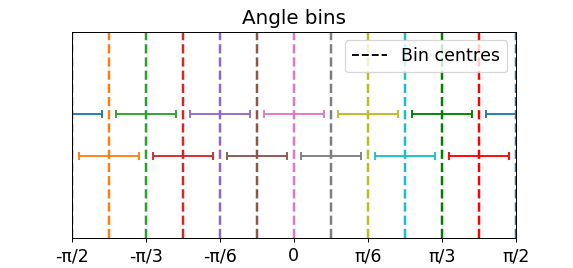

In [2]:
# Bin illustration

plt.close()

fig = plt.figure(figsize=[6.4, 3.0])

ax = fig.add_subplot(111)
ax.set_title("Angle bins")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, 1)
ax.get_yaxis().set_ticks([])
line = lines.Line2D([0, 1], [0, 1], linestyle='dashed', color='black')
ax.legend([line], ["Bin centres"])

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/3), ['-π/2', '-π/3', '-π/6', 0, 'π/6', 'π/3', 'π/2'])
plt.xlabel("Stimulus angle (rad)")

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors = colors + ['green', 'red', colors[0]]

x = np.arange(-np.pi, np.pi, 0.01)

offset = 0.1
bin_width = np.pi/6
for (c, col) in zip(np.arange(-np.pi, np.pi+bin_width, bin_width), colors):
    ax.axvline(c, color=col, linewidth=2, linestyle='dashed')
    
    min_b = c-bin_width+0.1
    max_b = c+bin_width-0.1
    ax.hlines(0.5+offset, min_b, max_b, color=col)
    ax.vlines([min_b, max_b], 0.5+offset-0.02, 0.5+offset+0.02, color=col)
    offset = -offset
    
#     ax.fill_between(x, 0, 1, where=np.logical_and(x < c + np.pi/6, x > c - np.pi/6), 
#                     color=col, alpha=0.4, transform=ax.get_xaxis_transform())

plt.savefig('figures/bin_illustration.pdf', dpi=300, format='pdf')
plt.savefig('figures/bin_illustration.png', dpi=300, format='png')
plt.show()

<IPython.core.display.Javascript object>


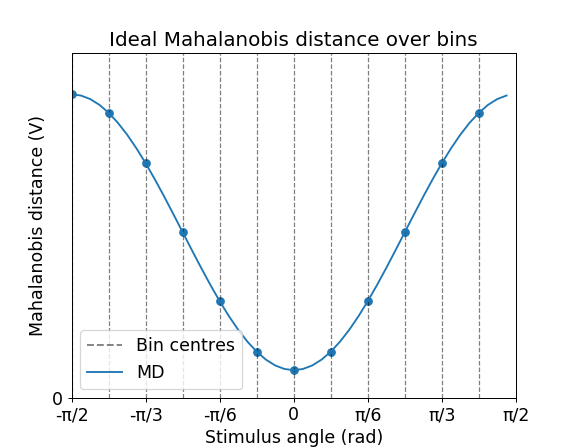

In [3]:
# Mahalanobis distance curve

plt.close()

fig = plt.figure(figsize=[6.4, 5.0])

ax = fig.add_subplot(111)
ax.set_title("Ideal Mahalanobis distance over bins")
ax.set_xlim(-0.5*np.pi, 0.5*np.pi)
ax.set_ylim(0, 2.5)
bin_line = lines.Line2D([0, 1], [0, 1], linestyle='dashed', color='black', alpha=0.5)
md_line = lines.Line2D([0, 1], [0, 1])
ax.legend([bin_line, md_line], ["Bin centres", "MD"])

plt.xticks(np.arange(-0.5*np.pi, 0.5*np.pi+0.1, np.pi/6), ['-π/2', '-π/3', '-π/6', 0, 'π/6', 'π/3', 'π/2'])
plt.xlabel("Stimulus angle (rad)")
plt.yticks([0], [0])
plt.ylabel("Mahalanobis distance (V)")

for c in np.arange(-0.5*np.pi, 0.5*np.pi, np.pi/12):
    ax.axvline(c, color='black', linewidth=1, linestyle='dashed', alpha=0.5)
    
ax.plot(np.arange(-0.5*np.pi, 0.5*np.pi, np.pi/48), -np.cos(np.arange(-np.pi, np.pi, np.pi/24)) + 1.2)
ax.scatter(np.arange(-0.5*np.pi, 0.5*np.pi, np.pi/12), -np.cos(np.arange(-np.pi, np.pi, np.pi/6)) + 1.2)
    
plt.savefig('figures/ideal_MD.pdf', dpi=300, format='pdf')
plt.savefig('figures/ideal_MD.png', dpi=300, format='png')
plt.show()

<IPython.core.display.Javascript object>


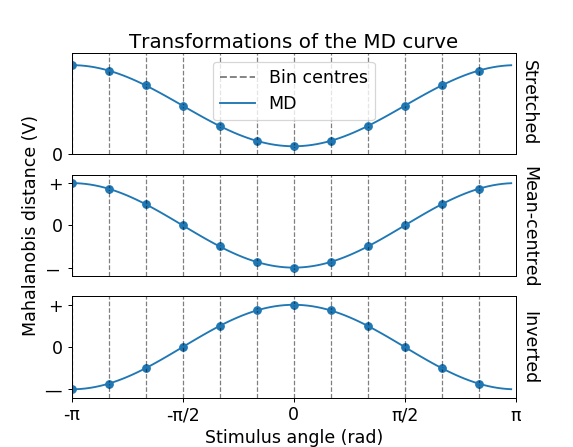

In [5]:
# Transforming MD curve

plt.close()

fig = plt.figure(figsize=[6.4, 5.0])

# Scaled

ax = fig.add_subplot(311)
ax.text(0, 3, "Transformations of the MD curve", size=16, verticalalignment='top', horizontalalignment='center')

ax.set_title('Stretched', rotation=-90, x=1.03, y=0.05, fontsize=14)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0, 2.5)
bin_line = lines.Line2D([0, 1], [0, 1], linestyle='dashed', color='black', alpha=0.5)
md_line = lines.Line2D([0, 1], [0, 1])
ax.legend([bin_line, md_line], ["Bin centres", "MD"])

plt.xticks([])
plt.xlabel("")
plt.yticks([0], [0])
plt.ylabel("")

for c in np.arange(-np.pi, np.pi, np.pi/6):
    ax.axvline(c, color='black', linewidth=1, linestyle='dashed', alpha=0.5)
    
ax.plot(np.arange(-np.pi, np.pi, np.pi/48), -np.cos(0.5*np.arange(-2*np.pi, 2*np.pi, np.pi/24)) + 1.2)
ax.scatter(np.arange(-np.pi, np.pi, np.pi/6), -np.cos(0.5*np.arange(-2*np.pi, 2*np.pi, np.pi/3)) + 1.2)

# Mean-centred

ax = fig.add_subplot(312)
# ax.set_title("Mean-centred", loc='right')
ax.set_title('Mean-centred', rotation=-90, x=1.03, y=-0.15, fontsize=14)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1.2, 1.2)
bin_line = lines.Line2D([0, 1], [0, 1], linestyle='dashed', color='black', alpha=0.5)
md_line = lines.Line2D([0, 1], [0, 1])

plt.xticks([])
plt.xlabel("")
plt.yticks([-1, 0, 1], ['—', 0, '+'])
plt.ylabel("Mahalanobis distance (V)")

for c in np.arange(-np.pi, np.pi, np.pi/6):
    ax.axvline(c, color='black', linewidth=1, linestyle='dashed', alpha=0.5)
    
ax.plot(np.arange(-np.pi, np.pi, np.pi/48), -np.cos(0.5*np.arange(-2*np.pi, 2*np.pi, np.pi/24)))
ax.scatter(np.arange(-np.pi, np.pi, np.pi/6), -np.cos(0.5*np.arange(-2*np.pi, 2*np.pi, np.pi/3)))

# Inverted

ax = fig.add_subplot(313)
# ax.set_title("Inverted")
ax.set_title('Inverted', rotation=-90, x=1.03, y=0.1, fontsize=14)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-1.2, 1.2)
bin_line = lines.Line2D([0, 1], [0, 1], linestyle='dashed', color='black', alpha=0.5)
md_line = lines.Line2D([0, 1], [0, 1])

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2), ['-π', '-π/2', 0, 'π/2', 'π'])
plt.xlabel("Stimulus angle (rad)")
plt.yticks([-1, 0, 1], ['—', 0, '+'])
plt.ylabel("")

for c in np.arange(-np.pi, np.pi, np.pi/6):
    ax.axvline(c, color='black', linewidth=1, linestyle='dashed', alpha=0.5)
    
ax.plot(np.arange(-np.pi, np.pi, np.pi/48), np.cos(0.5*np.arange(-2*np.pi, 2*np.pi, np.pi/24)))
ax.scatter(np.arange(-np.pi, np.pi, np.pi/6), np.cos(0.5*np.arange(-2*np.pi, 2*np.pi, np.pi/3)))
    
plt.savefig('figures/transformed_MD.pdf', dpi=300, format='pdf')
plt.show()

<IPython.core.display.Javascript object>


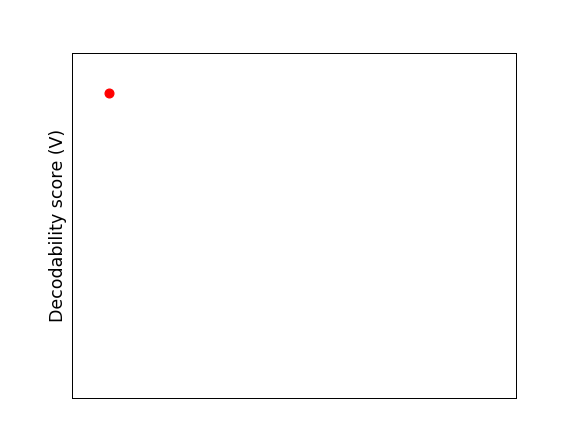

In [41]:
# Decodability curve demonstration (1/2)
plt.close()

fig = plt.figure(figsize=[6.4, 5.0])

ax = fig.add_subplot(111)
ax.set_title("")

ax.set_ylim(-0.002, 0.032)
ax.set_xlim(0, 1200)

plt.xticks([])
# plt.xlabel("Time (s)")
plt.yticks([])
plt.ylabel("Decodability score (V)")

ax.scatter(100, cos_amp[100], s=50, c='red')

plt.savefig('figures/dec_curve_demo1.png', dpi=300, format='png')

<IPython.core.display.Javascript object>


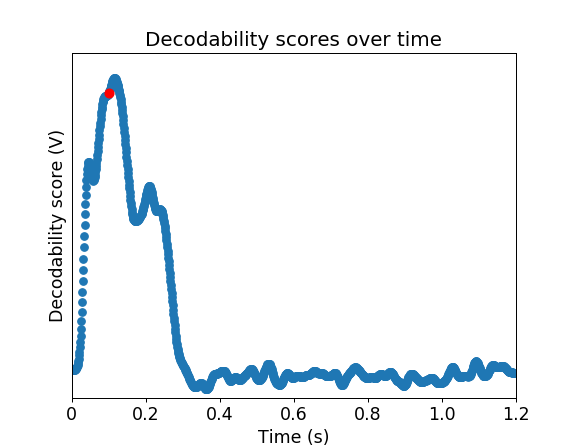

In [42]:
# Decodability curve demonstration (2/2)
plt.close()

fig = plt.figure(figsize=[6.4, 5.0])

cos_amp = np.load('/Users/s3182541/STSP/Decoding/data/sweep/probe_0,01/cos_amp.npy')
cos_amp = gauss(cos_amp, sigma=8)

ax = fig.add_subplot(111)
ax.set_title("Decodability scores over time")

ax.set_ylim(-0.002, 0.032)
ax.set_xlim(0, 1200)

plt.xticks(range(0, 1300, 200), [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
plt.xlabel("Time (s)")
plt.yticks([])
plt.ylabel("Decodability score (V)")

ax.scatter(range(len(cos_amp)), cos_amp)
ax.scatter(100, cos_amp[100], s=50, c='red')

plt.savefig('figures/dec_curve_demo2.png', dpi=300, format='png')

# Results

## Experiment 1

### Figure 1

<IPython.core.display.Javascript object>


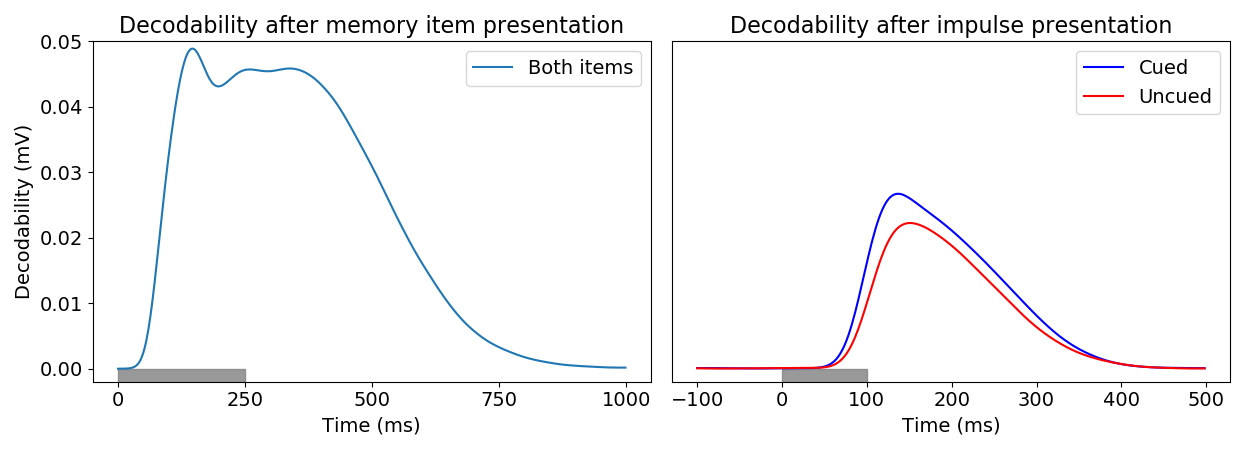

In [39]:
plt.close()

dec = np.load('figures/data/decodability_c_exp1.npy')[:500]
dec_cued = np.load('figures/data/decodability_c_cued.npy')[1025:1325]
dec_uncued = np.load('figures/data/decodability_c_uncued.npy')[1025:1325]

fig = plt.figure(figsize=[12.45, 4.5], tight_layout=True)


ax = fig.add_subplot(121)

ax.set_title("Decodability after memory item presentation")

plt.xlabel("Time (ms)")
plt.ylabel("Decodability (mV)")
ax.set_ylim(-0.002, 0.05)

plt.xticks([0, 250, 500, 750, 1000])

ax.plot(range(0, 1000, 2), dec, label="Both items")

plt.legend()

rect = mpl.patches.Rectangle((0, -0.01), 250, 0.01, color='gray', alpha=0.8)
ax.add_patch(rect)


ax = fig.add_subplot(122)

ax.set_title("Decodability after impulse presentation")

plt.xlabel("Time (ms)")
plt.xticks([-100, 0, 100, 200, 300, 400, 500])
plt.ylabel("")
plt.yticks([])
ax.set_ylim(-0.002, 0.05)

ax.plot(range(-100, 500, 2), dec_cued, label="Cued", color='b')
ax.plot(range(-100, 500, 2), dec_uncued, label="Uncued", color='r')

plt.legend()

rect = mpl.patches.Rectangle((0, -0.01), 100, 0.01, color='gray', alpha=0.8)
ax.add_patch(rect)


plt.savefig('figures/results_exp1_dec_impulse.pdf', dpi=300, format='pdf')

### Figure 2

<IPython.core.display.Javascript object>


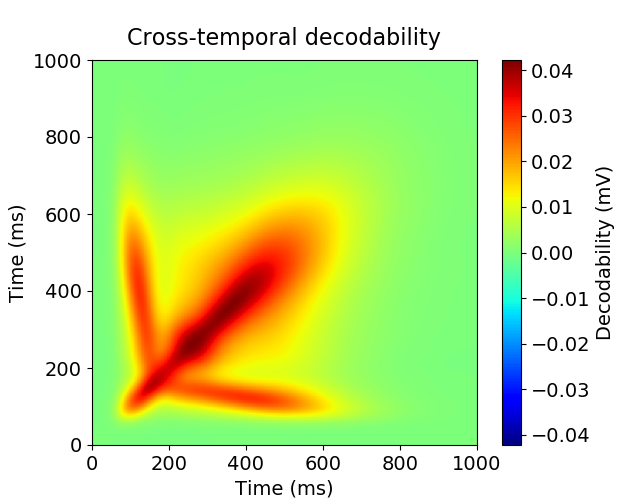

In [11]:
plt.close()

ctda = np.load('figures/data/cross_exp1.npy')

fig = plt.figure(figsize=[6.4, 5.0])

ax = fig.add_subplot(111)

ax.set_title("Cross-temporal decodability", pad=11)

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Time (ms)")

vmax = np.max(ctda)

extents = [0, 1000, 0, 1000]
im = ax.imshow(
    ctda, 
    cmap='jet', 
    origin='lower', 
    extent=extents,
    vmin=-vmax,
    vmax=vmax)

fig.colorbar(im, label="Decodability (mV)")

plt.savefig('figures/results_exp1_cross.pdf', dpi=300, format='pdf')

### Figure 3

<IPython.core.display.Javascript object>


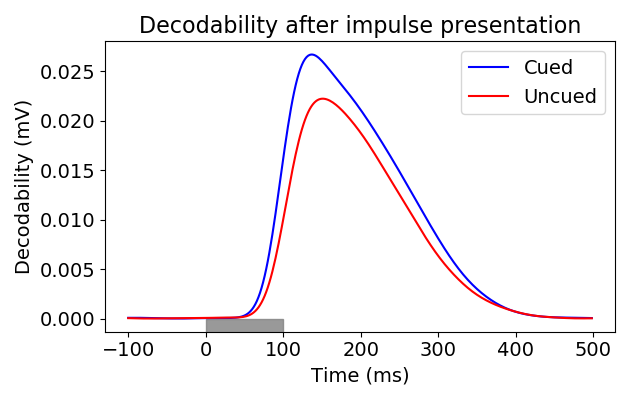

In [41]:
plt.close()

dec_cued = np.load('figures/data/decodability_c_cued.npy')[1025:1325]
dec_uncued = np.load('figures/data/decodability_c_uncued.npy')[1025:1325]

fig = plt.figure(figsize=[6.3, 4.0], tight_layout=True)

ax = fig.add_subplot(111)

ax.set_title("Decodability after impulse presentation")

plt.xlabel("Time (ms)")
plt.xticks([-100, 0, 100, 200, 300, 400, 500])
plt.ylabel("Decodability (mV)")

ax.plot(range(-100, 500, 2), dec_cued, label="Cued", color='b')
ax.plot(range(-100, 500, 2), dec_uncued, label="Uncued", color='r')

plt.legend()

rect = mpl.patches.Rectangle((0, -0.01), 100, 0.01, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.savefig('figures/results_exp1_impulse.pdf', dpi=300, format='pdf')

## Experiment 2

### Figure 1

<IPython.core.display.Javascript object>


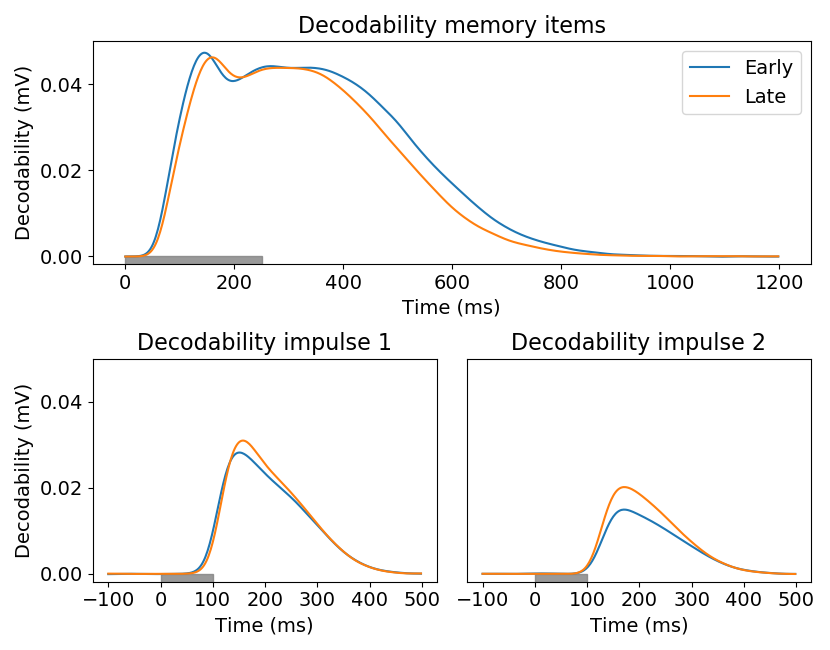

In [28]:
plt.close()

ymax = 0.05
ymin = -0.0018

dec_early = np.load('figures/data/decodability_c_early.npy')
dec_late = np.load('figures/data/decodability_c_late.npy')

dec_early_imp1 = dec_early[550:850]
dec_late_imp1 = dec_late[550:850]
dec_early_imp2 = dec_early[1850:2150]
dec_late_imp2 = dec_late[1850:2150]

dec_early = dec_early[:600]
dec_late = dec_late[:600]

fig = plt.figure(figsize=[8.3, 6.5], tight_layout=True)
gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

ax = fig.add_subplot(gs[0, 0:2])

ax.set_title("Decodability memory items")

plt.xlabel("Time (ms)")
plt.ylabel("Decodability (mV)")

ax.set_ylim(ymin, ymax)

ax.plot(range(0, 1200, 2), dec_early, label="Early")
ax.plot(range(0, 1200, 2), dec_late, label="Late")

plt.legend()

rect = mpl.patches.Rectangle((0, -0.01), 250, 0.01, color='gray', alpha=0.8)
ax.add_patch(rect)

ax = fig.add_subplot(gs[1, 0])

ax.set_title("Decodability impulse 1")

plt.xlabel("Time (ms)")
plt.xticks(range(-100, 501, 100))
plt.ylabel("Decodability (mV)")
ax.set_ylim(ymin, ymax)

ax.plot(range(-100, 500, 2), dec_early_imp1, label="Early")
ax.plot(range(-100, 500, 2), dec_late_imp1, label="Late")

rect = mpl.patches.Rectangle((0, -0.01), 100, 0.01, color='gray', alpha=0.8)
ax.add_patch(rect)

ax = fig.add_subplot(gs[1, 1])

ax.set_title("Decodability impulse 2")

plt.xlabel("Time (ms)")
plt.xticks(range(-100, 501, 100))
plt.ylabel("")
plt.yticks([])
ax.set_ylim(ymin, ymax)

ax.plot(range(-100, 500, 2), dec_early_imp2, label="Early")
ax.plot(range(-100, 500, 2), dec_late_imp2, label="Late")

rect = mpl.patches.Rectangle((0, -0.01), 100, 0.01, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.savefig('figures/results_exp2_dec_impulse.pdf', dpi=300, format='pdf')

### Figure 2

<IPython.core.display.Javascript object>


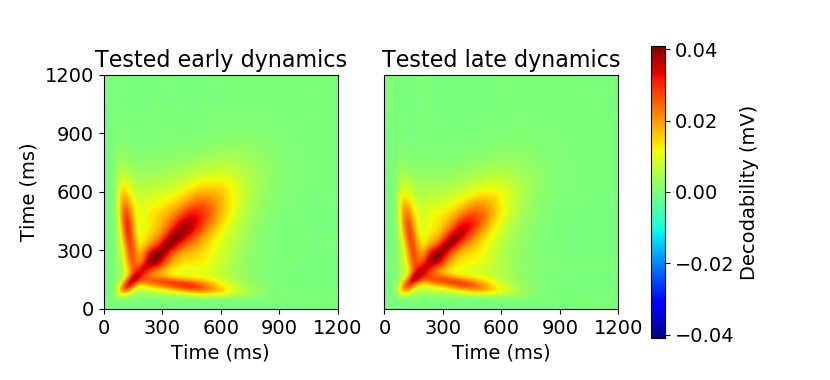

In [27]:
plt.close()

ctda_early = np.load('figures/data/cross_exp2_early.npy')
ctda_late = np.load('figures/data/cross_exp2_late.npy')

vmax = max(np.max(ctda_early), np.max(ctda_early))
vmin = -vmax
extent = [0, 1200, 0, 1200]

fig = plt.figure(figsize=[8.3, 3.8], tight_layout=False)

ax0 = fig.add_subplot(121)

ax0.set_title("Tested early dynamics")

plt.xticks([0, 300, 600, 900, 1200])
plt.xlabel("Time (ms)")
plt.yticks([0, 300, 600, 900, 1200])
plt.ylabel("Time (ms)")

ax0.imshow(ctda_early, cmap='jet', origin='lower', vmin=vmin, vmax=vmax, extent=extent)

ax1 = fig.add_subplot(122)

ax1.set_title("Tested late dynamics")

plt.xticks([0, 300, 600, 900, 1200])
plt.xlabel("Time (ms)")
plt.yticks([])

im = ax1.imshow(ctda_late, cmap='jet', origin='lower', vmin=vmin, vmax=vmax, extent=extent)

fig.colorbar(im, ax=[ax0, ax1], label="Decodability (mV)")

plt.savefig('figures/results_exp2_cross.pdf', dpi=300, format='pdf')

# Discussion

## Experiment 1

### Figure 1 

#### Model

In [34]:
ymin = -1.5
ymax = 3

vmax = 5
vmin = -vmax
extent = [0, 1000, 0, 1000]

<IPython.core.display.Javascript object>


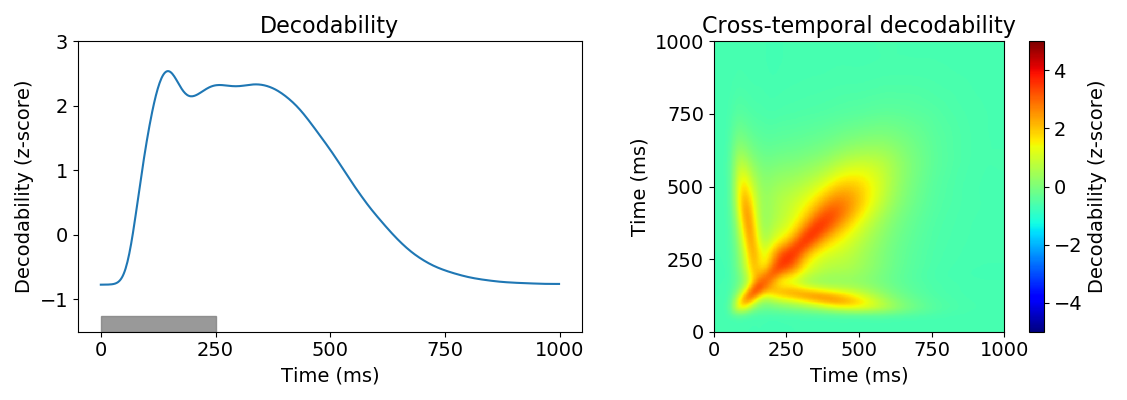

In [39]:
plt.close()

dec = np.load('figures/data/decodability_z_exp1.npy')[:500]
ctda = np.load('figures/data/z_exp1.npy')

fig = plt.figure(figsize=[11.27, 4.0], tight_layout=True)
gs = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)

ax = fig.add_subplot(gs[0, 0:2])

ax.set_title("Decodability")

plt.ylabel("Decodability (z-score)")
plt.xlabel("Time (ms)")

plt.xticks([0, 125, 250, 375, 500], [0, 250, 500, 750, 1000])
ax.set_ylim(ymin, ymax)

ax.plot(dec[:500])

rect = mpl.patches.Rectangle((0, -1.5), 125, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

ax = fig.add_subplot(gs[0, 2:4])

ax.set_title("Cross-temporal decodability")

plt.xlabel("Time (ms)")
plt.ylabel("Time (ms)")
plt.xticks([0, 250, 500, 750, 1000])
plt.yticks([0, 250, 500, 750, 1000])

im = ax.imshow(
    ctda, 
    cmap='jet', 
    origin='lower', 
    extent=extent,
    vmin=vmin,
    vmax=vmax)

plt.colorbar(im, label="Decodability (z-score)")

plt.savefig('figures/parts/exp1_fig1_model.pdf', dpi=300, format='pdf')

plt.show()

#### Data

<IPython.core.display.Javascript object>


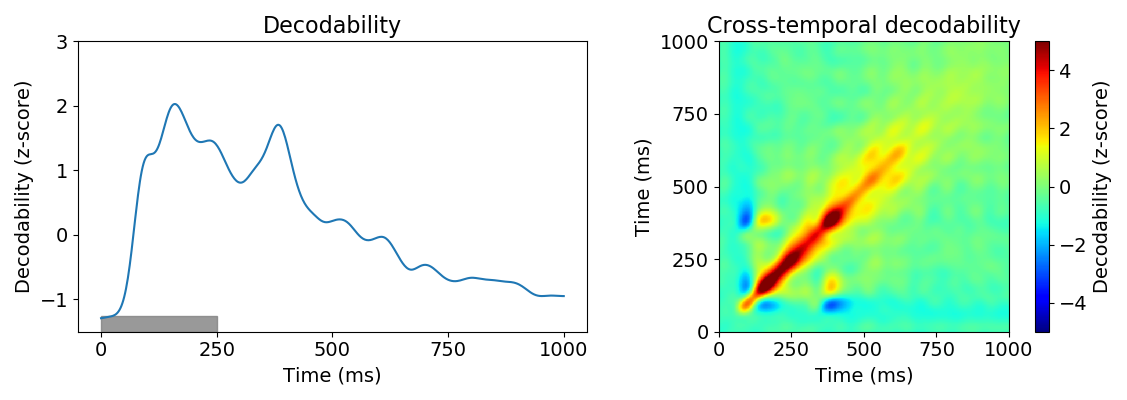

In [40]:
plt.close()

dec = np.load('figures/data/decodability_z_exp1_wolff.npy')
time = np.load('figures/data/mem_time_exp1.npy')
dec = dec[np.logical_and(time >= 0, time <= 1)]
ctda = np.load('figures/data/z_exp1_cross_wolff.npy')

fig = plt.figure(figsize=[11.27, 4.0], tight_layout=True)
gs = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)

ax = fig.add_subplot(gs[0, 0:2])

ax.set_title("Decodability")

plt.ylabel("Decodability (z-score)")
plt.xlabel("Time (ms)")

plt.xticks([0, 125, 250, 375, 500], [0, 250, 500, 750, 1000])
ax.set_ylim(ymin, ymax)

ax.plot(dec)

rect = mpl.patches.Rectangle((0, -1.5), 125, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

ax = fig.add_subplot(gs[0, 2:4])

ax.set_title("Cross-temporal decodability")

plt.xlabel("Time (ms)")
plt.ylabel("Time (ms)")
plt.xticks([0, 250, 500, 750, 1000])
plt.yticks([0, 250, 500, 750, 1000])

im = ax.imshow(
    ctda, 
    cmap='jet', 
    origin='lower', 
    extent=extent,
    vmin=vmin,
    vmax=vmax)

plt.colorbar(im, label="Decodability (z-score)")

plt.savefig('figures/parts/exp1_fig1_data.pdf', dpi=300, format='pdf')

plt.show()

### Figure 2 - Impulse

<IPython.core.display.Javascript object>


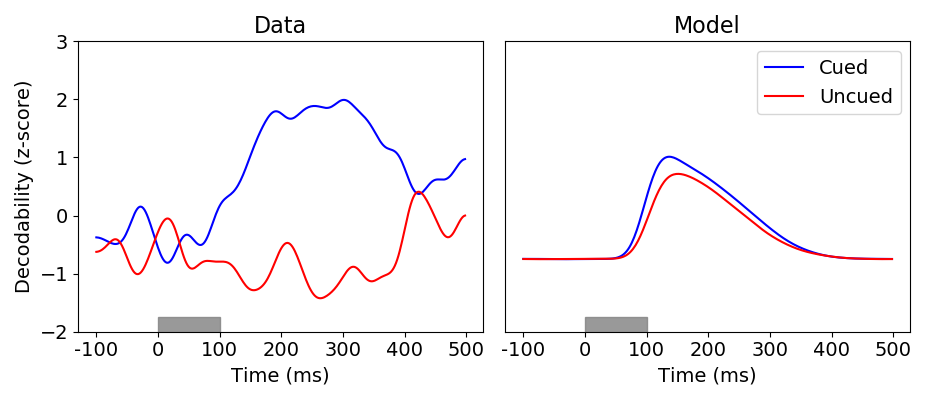

In [40]:
plt.close()

model_cued = np.load('figures/data/decodability_z_cued.npy')[1025:1325]
model_uncued = np.load('figures/data/decodability_z_uncued.npy')[1025:1325]
data_cued = np.load('figures/data/decodability_z_cued_wolff.npy')
data_uncued = np.load('figures/data/decodability_z_uncued_wolff.npy')
data_time = np.load('figures/data/impulse_time_exp1.npy')

max_y = 3
min_y = -2

fig = plt.figure(figsize=[9.27, 4.0], tight_layout=True)

ax = fig.add_subplot(121)

ax.set_title("Data")

plt.xlabel("Time (ms)")
plt.xticks([0, 50, 100, 150, 200, 250, 300], [-100, 0, 100, 200, 300, 400, 500])
plt.ylabel("Decodability (z-score)")
ax.set_ylim([min_y, max_y])

ax.plot(data_cued, label="Cued", color='b')
ax.plot(data_uncued, label="Uncued", color='r')

rect = mpl.patches.Rectangle((50, -2.5), 50, 0.75, color='gray', alpha=0.8)
ax.add_patch(rect)


ax = fig.add_subplot(122)

ax.set_title("Model")

plt.xlabel("Time (ms)")
plt.xticks([0, 50, 100, 150, 200, 250, 300], [-100, 0, 100, 200, 300, 400, 500])
plt.ylabel("")
plt.yticks([])
ax.set_ylim([min_y, max_y])

ax.plot(model_cued, label="Cued", color='b')
ax.plot(model_uncued, label="Uncued", color='r')

plt.legend()

rect = mpl.patches.Rectangle((50, -2.5), 50, 0.75, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.savefig('figures/parts/exp1_fig2.pdf', dpi=300, format='pdf')

## Experiment 2

### Figure 1

In [2]:
ymin = -1.5
ymax = 3.5

cmap = 'jet'
vmin = -4
vmax = 4
extent = [0, 1200, 0, 1200]

#### Model

<IPython.core.display.Javascript object>


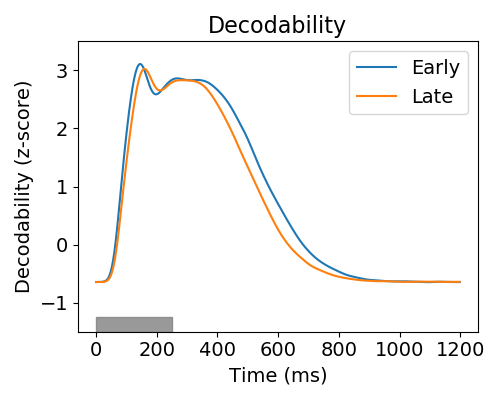

In [6]:
plt.close()

dec_early = np.load('figures/data/decodability_z_early.npy')[:600]
dec_late = np.load('figures/data/decodability_z_late.npy')[:600]

fig = plt.figure(figsize=[5.0, 4.0], tight_layout=True)

ax = fig.add_subplot(111)

ax.set_title("Decodability")

plt.xlabel("Time (ms)")
plt.xticks(range(0, 1201, 200))
plt.ylabel("Decodability (z-score)")

ax.set_ylim(ymin, ymax)

ax.plot(range(0, 1200, 2), dec_early, label="Early")
ax.plot(range(0, 1200, 2), dec_late, label="Late")

plt.legend()

rect = mpl.patches.Rectangle((0, -1.5), 250, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.savefig('figures/parts/exp2_fig1_model_1.pdf', dpi=300, format='pdf')

<IPython.core.display.Javascript object>


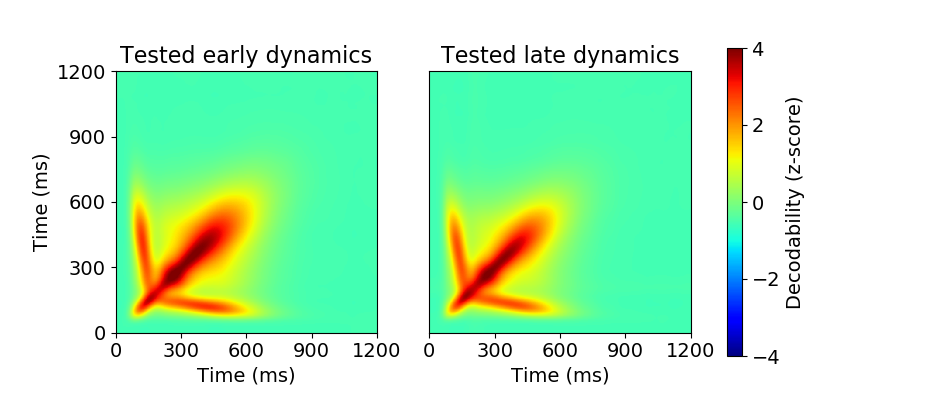

In [118]:
plt.close()

ctda_early = np.load('figures/data/z_exp2_early.npy')
ctda_late = np.load('figures/data/z_exp2_late.npy')

fig = plt.figure(figsize=[9.27, 4.0], tight_layout=False)

ax0 = fig.add_subplot(121)

ax0.set_title("Tested early dynamics")

plt.xticks([0, 300, 600, 900, 1200])
plt.xlabel("Time (ms)")
plt.yticks([0, 300, 600, 900, 1200])
plt.ylabel("Time (ms)")

ax0.imshow(ctda_early, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax, extent=extent)

ax1 = fig.add_subplot(122)

ax1.set_title("Tested late dynamics")

plt.xticks([0, 300, 600, 900, 1200])
plt.xlabel("Time (ms)")
plt.yticks([])

im = ax1.imshow(ctda_late, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax, extent=extent)

fig.colorbar(im, ax=[ax0, ax1], label="Decodability (z-score)")

plt.savefig('figures/parts/exp2_fig1_model_2.pdf', dpi=300, format='pdf')

#### Data

<IPython.core.display.Javascript object>


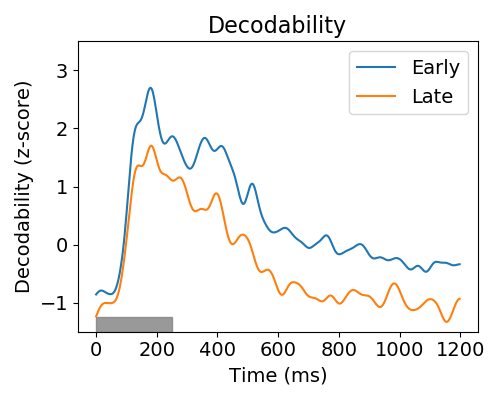

In [7]:
plt.close()

dec_early = np.load('figures/data/decodability_z_early_wolff.npy')
dec_late = np.load('figures/data/decodability_z_late_wolff.npy')
time = np.load('figures/data/mem_time_exp2.npy')

dec_early = dec_early[time >= 0]
dec_late = dec_late[time >= 0]
time = time[time >= 0]
time = time * 1000

fig = plt.figure(figsize=[5.0, 4.0], tight_layout=True)

ax = fig.add_subplot(111)

ax.set_title("Decodability")

plt.xlabel("Time (ms)")
plt.xticks(range(0, 1201, 200))
plt.ylabel("Decodability (z-score)")

ax.set_ylim(ymin, ymax)

ax.plot(time, dec_early, label="Early")
ax.plot(time, dec_late, label="Late")

plt.legend()

rect = mpl.patches.Rectangle((0, -1.5), 250, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.savefig('figures/parts/exp2_fig1_data_1.pdf', dpi=300, format='pdf')

<IPython.core.display.Javascript object>


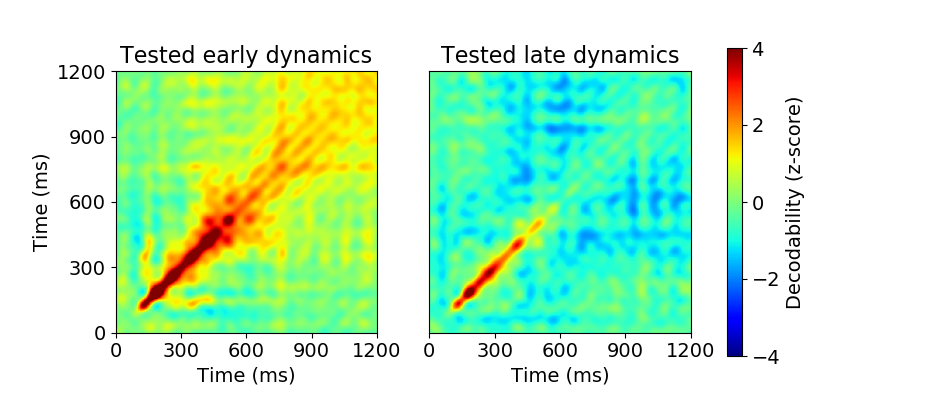

In [14]:
plt.close()

ctda_early = np.load('figures/data/z_exp2_early_wolff.npy')
ctda_late = np.load('figures/data/z_exp2_late_wolff.npy')
num_include = len(time)
ctda_early = ctda_early[-num_include:, -num_include:]
ctda_late = ctda_late[-num_include:, -num_include:]

fig = plt.figure(figsize=[9.27, 4.0], tight_layout=False)

ax0 = fig.add_subplot(121)

ax0.set_title("Tested early dynamics")

plt.xticks([0, 300, 600, 900, 1200])
plt.xlabel("Time (ms)")
plt.yticks([0, 300, 600, 900, 1200])
plt.ylabel("Time (ms)")

ax0.imshow(ctda_early, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax, extent=extent)

ax1 = fig.add_subplot(122)

ax1.set_title("Tested late dynamics")

plt.xticks([0, 300, 600, 900, 1200])
plt.xlabel("Time (ms)")
plt.yticks([])

im = ax1.imshow(ctda_late, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax, extent=extent)

fig.colorbar(im, ax=[ax0, ax1], label="Decodability (z-score)")

plt.savefig('figures/parts/exp2_fig1_data_2.pdf', dpi=300, format='pdf')

### Figure 2

In [15]:
ymin = -2
ymax = 3.5

#### Model

<IPython.core.display.Javascript object>


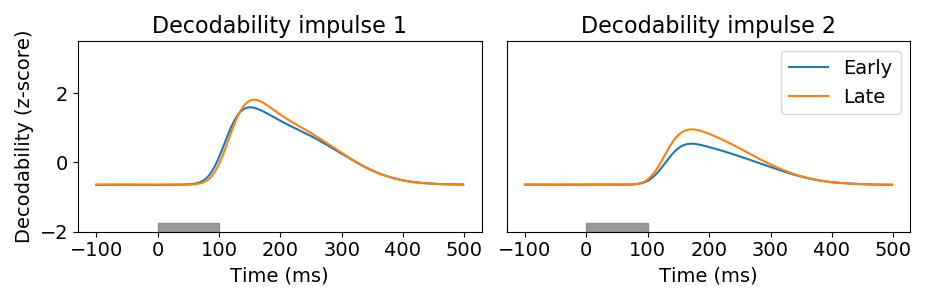

In [16]:
plt.close()

dec_early = np.load('figures/data/decodability_z_early.npy')
dec_late = np.load('figures/data/decodability_z_late.npy')

dec_early_imp1 = dec_early[550:850]
dec_late_imp1 = dec_late[550:850]
dec_early_imp2 = dec_early[1850:2150]
dec_late_imp2 = dec_late[1850:2150]

fig = plt.figure(figsize=[9.27, 3.0], tight_layout=True)

ax = fig.add_subplot(121)

ax.set_title("Decodability impulse 1")

plt.xlabel("Time (ms)")
plt.xticks(range(-100, 501, 100))
plt.ylabel("Decodability (z-score)")
ax.set_ylim(ymin, ymax)

ax.plot(range(-100, 500, 2), dec_early_imp1, label="Early")
ax.plot(range(-100, 500, 2), dec_late_imp1, label="Late")

rect = mpl.patches.Rectangle((0, ymin), 100, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

ax = fig.add_subplot(122)

ax.set_title("Decodability impulse 2")

plt.xlabel("Time (ms)")
plt.xticks(range(-100, 501, 100))
plt.ylabel("")
plt.yticks([])
ax.set_ylim(ymin, ymax)

ax.plot(range(-100, 500, 2), dec_early_imp2, label="Early")
ax.plot(range(-100, 500, 2), dec_late_imp2, label="Late")

rect = mpl.patches.Rectangle((0, ymin), 100, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.legend()

plt.savefig('figures/parts/exp2_fig2_model.pdf', dpi=300, format='pdf')

#### Data

<IPython.core.display.Javascript object>


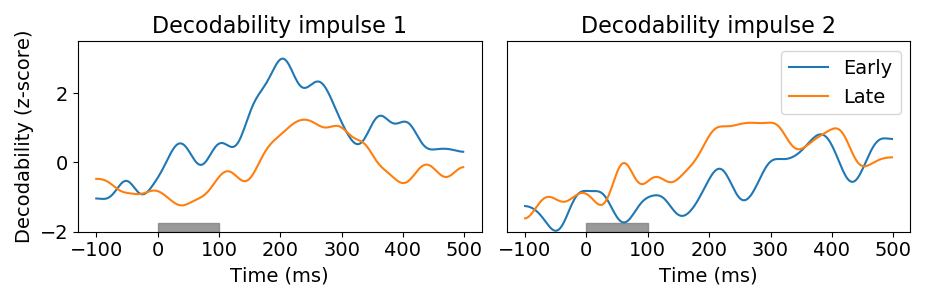

In [17]:
plt.close()

dec_early_imp1 = np.load('figures/data/z_imp1_early_wolff.npy')
dec_late_imp1 = np.load('figures/data/z_imp1_late_wolff.npy')
dec_early_imp2 = np.load('figures/data/z_imp2_early_wolff.npy')
dec_late_imp2 = np.load('figures/data/z_imp2_late_wolff.npy')

fig = plt.figure(figsize=[9.27, 3.0], tight_layout=True)

ax = fig.add_subplot(121)

ax.set_title("Decodability impulse 1")

plt.xlabel("Time (ms)")
plt.xticks(range(-100, 501, 100))
plt.ylabel("Decodability (z-score)")
ax.set_ylim(ymin, ymax)

ax.plot(range(-100, 500, 2), dec_early_imp1, label="Early")
ax.plot(range(-100, 500, 2), dec_late_imp1, label="Late")

rect = mpl.patches.Rectangle((0, ymin), 100, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

ax = fig.add_subplot(122)

ax.set_title("Decodability impulse 2")

plt.xlabel("Time (ms)")
plt.xticks(range(-100, 501, 100))
plt.ylabel("")
plt.yticks([])
ax.set_ylim(ymin, ymax)

ax.plot(range(-100, 500, 2), dec_early_imp2, label="Early")
ax.plot(range(-100, 500, 2), dec_late_imp2, label="Late")

rect = mpl.patches.Rectangle((0, ymin), 100, 0.25, color='gray', alpha=0.8)
ax.add_patch(rect)

plt.legend()

plt.savefig('figures/parts/exp2_fig2_data.pdf', dpi=300, format='pdf')